***K-Arms Bandit Epsilon-Greedy Policy:***
Initialize, for a = 1 to k:
$Q(a) \leftarrow 0$
$N(a) \leftarrow 0$
Loop forever:
A $\leftarrow$ argmax$_{a}$ $Q(a)$ with probability $1-\epsilon$ or a random action with probability $\epsilon$
$R \leftarrow$ bandit or environment ($A$)
$N(A) \leftarrow N(A)+1$
$Q(A) \leftarrow Q(A)+\frac{R-Q(A)}{N(A)}$

In [88]:
import numpy as np
from tqdm import tqdm
from PIL import Image
import matplotlib.pyplot as plt

In [106]:
Num_actions = 10
qs = np.random.randn(1, Num_actions)
optimal_action = np.argmax(qs)
Time_step = 10000
epsilon = 0.2

**Plot greedy**

In [105]:
def plot_greedy(reward, select_action, optimal_action, til):

    Optimal_Action_Percent = np.mean(select_action == optimal_action)
    fig, axs = plt.subplots(nrows=2, ncols=1, sharey='row', figsize=(7, 5))
    plt.rcParams.update({'font.size': 10})
    axs[0].plot(reward.flatten(),label='E-greedy Rewards')
    axs[0].set_ylabel('Reward', fontsize=10)
    # axs[0].legend(fontsize=16, ncol=1, frameon=False, loc='best', labelcolor='linecolor', handlelength=0)
    axs[0].set_title(f" {til} Rewards; Optimal action percent {Optimal_Action_Percent*100:0.2f}", loc='right', y=1 + 0.17, pad=-20, color='deeppink', fontsize=10, fontstyle='italic')

    axs[1].plot(select_action.flatten(),label='E-greedy Selected Actions')
    axs[1].set_xlabel('Time Step', fontsize=10)
    axs[1].set_ylabel('Selected Actions', fontsize=10)
    # axs[1].legend(fontsize=16, ncol=1, frameon=False, loc='best', labelcolor='linecolor', handlelength=0)
    axs[1].set_title(f" {til} Selected Actions; Optimal action: {optimal_action}", loc='right', y=1 + 0.17, pad=-20, color='deeppink', fontsize=10, fontstyle='italic')
    plt.tight_layout(), plt.subplots_adjust(wspace=0, hspace=0.2), plt.show()
    fig.savefig(F"{til}.svg", format='svg')

**Greedy Algorithm:**
Greedy algorithm only consider the reward at the moment and do not take the long-term into consideration (action only based on max A).
Greedy algorithm based solely on exploitation.
***Exploitation*** is when the agent knows all his options and chooses the best option based on the previous success rates

***Greedy Algorithm for stationary state***
$Q(A) \leftarrow Q(A)+\frac{R-Q(A)}{N(A)}$; $N(A)\leftarrow$ Average samples

100%|██████████| 2000/2000 [00:00<00:00, 12397.15it/s]


Q greedy algorithm: [[-0.21916944 -0.3422664  -0.10255127 -0.13049546  0.63478888  0.
   0.         -2.44990433  0.         -0.76525626]]


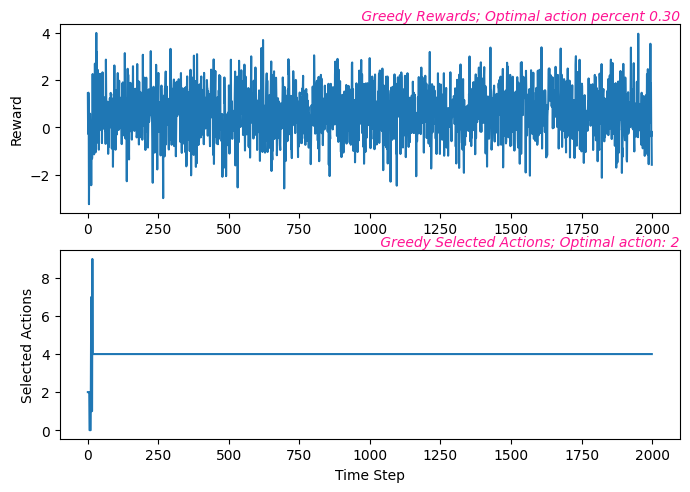

In [104]:
def greedy_1episode (qs, time_step, num_actions):
    Optimal_action = np.argmax(qs)
    select_action = np.zeros((1, time_step))
    reward = np.zeros((1, time_step))
    q = np.zeros((1, num_actions))
    counter = np.zeros((1, num_actions))

    for i in tqdm(range(0, time_step)):
    # ===================================== Exploitation =========================================
        A = np.where(q == np.max(q))[1]
        A = A[np.random.randint(0, len(A))]

        select_action[:, i] = A
        counter[:, A] = counter[:, A] + 1           # The number of occurrences of action A

        reward[:, i] = qs[:, A] + np.random.randn(1)

        q[:, A] = q[:, A] + 1 / counter[:, A] * (reward[:, i] - q[:, A])
    # ============================================================================================
    print(f"Q greedy algorithm: {q}")
    plot_greedy(reward, select_action, Optimal_action, til='Greedy')

greedy_1episode(qs, Time_step, Num_actions)

***Epsilon greedy Algorithm for stationary state***
It algorithm based on exploitation ana exploration.
Giving chance to all actions.
$Q(A) \leftarrow Q(A)+\frac{R-Q(A)}{N(A)}$; $N(A)\leftarrow$ Average samples

100%|██████████| 2000/2000 [00:00<00:00, 13430.52it/s]


Q greedy algorithm: [[ 0.         -0.06761444  0.2600807   0.45912986  0.54522155  0.17741924
  -0.8487128  -1.73550226 -0.41167537 -0.42469304]]


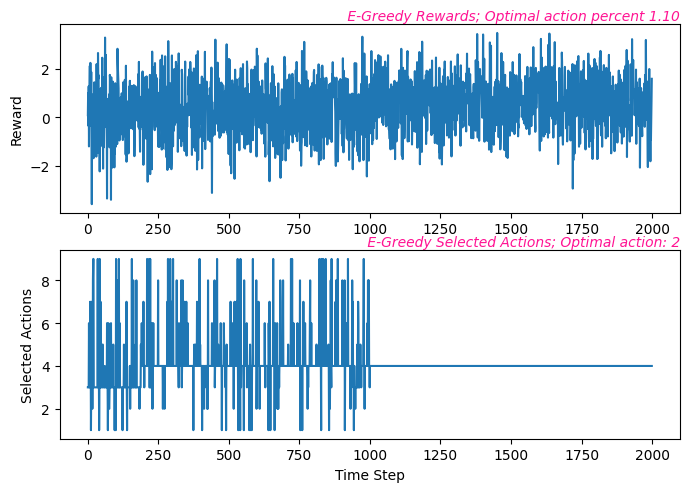

In [103]:
def epsilon_greedy_1episode (qs, time_step, num_actions, epsilon):
    Optimal_action = np.argmax(qs)
    select_action = np.zeros((1, time_step))
    reward = np.zeros((1, time_step))
    q = np.zeros((1, num_actions))
    counter = np.zeros((1, num_actions))
    for i in tqdm(range(0,time_step)):
    # ===================================== Exploitation =========================================
        A = np.where(q==np.max(q))[1]
        A = A[np.random.randint(0,len(A))]
    # ---------------------------------------- Exploration ---------------------------------------
        if i > 1e3:
            """
            The greedy algorithm can be used if there is a good interaction with the environment and sufficient knowledge of the environment.
            """
            epsilon = 0
        if np.random.rand(1) < epsilon:            #  [0 1]  epsilon = 0.1
           A =  np.random.randint(1,num_actions , 1)
    # --------------------------------------------------------------------------------------------
        select_action[:,i] = A
        counter[:,A] = counter[:,A]+1

        reward[:,i] = qs[:,A] + np.random.randn(1)

        q[:,A] = q[:,A] + 1/counter[:,A]*(reward[:,i] - q[:,A])
    # ============================================================================================
    print(f"Q greedy algorithm: {q}")
    plot_greedy(reward, select_action, Optimal_action, til='E-Greedy')

epsilon_greedy_1episode (qs, Time_step, Num_actions, epsilon)

***Epsilon greedy Algorithm for N episode in stationary & non-stationary state***
$Q(A) \leftarrow Q(A)+\frac{R-Q(A)}{N(A)}$; $N(A)\leftarrow$ Average samples
$Q(A) \leftarrow Q(A)+\alpha*({R-Q(A)})$; $\alpha\leftarrow$ Constant alpha

Episode 0 / 1000
Episode 1 / 1000
Episode 2 / 1000
Episode 3 / 1000
Episode 4 / 1000
Episode 5 / 1000
Episode 6 / 1000
Episode 7 / 1000
Episode 8 / 1000
Episode 9 / 1000
Episode 10 / 1000
Episode 11 / 1000
Episode 12 / 1000
Episode 13 / 1000
Episode 14 / 1000
Episode 15 / 1000
Episode 16 / 1000
Episode 17 / 1000
Episode 18 / 1000
Episode 19 / 1000
Episode 20 / 1000
Episode 21 / 1000
Episode 22 / 1000
Episode 23 / 1000
Episode 24 / 1000
Episode 25 / 1000
Episode 26 / 1000
Episode 27 / 1000
Episode 28 / 1000
Episode 29 / 1000
Episode 30 / 1000
Episode 31 / 1000
Episode 32 / 1000
Episode 33 / 1000
Episode 34 / 1000
Episode 35 / 1000
Episode 36 / 1000
Episode 37 / 1000
Episode 38 / 1000
Episode 39 / 1000
Episode 40 / 1000
Episode 41 / 1000
Episode 42 / 1000
Episode 43 / 1000
Episode 44 / 1000
Episode 45 / 1000
Episode 46 / 1000
Episode 47 / 1000
Episode 48 / 1000
Episode 49 / 1000
Episode 50 / 1000
Episode 51 / 1000
Episode 52 / 1000
Episode 53 / 1000
Episode 54 / 1000
Episode 55 / 1000
Ep

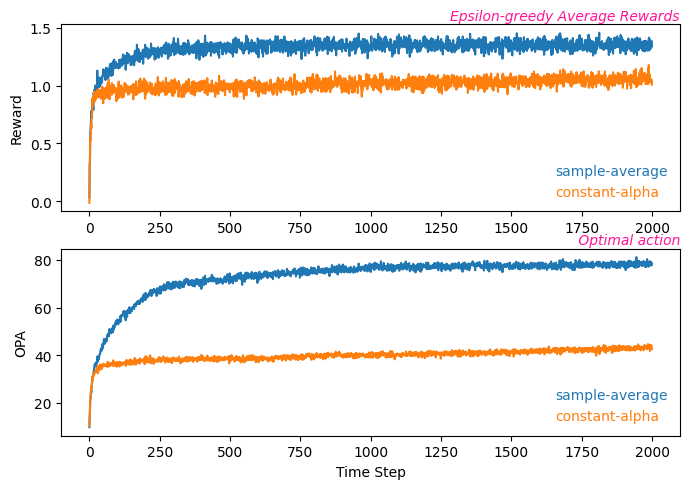

"\n# type = 'stationary', 'non-stationary'\n# method = 'sample-average' or 'constant-alpha'\n"

In [102]:
def epsilon_greedy_Nepisode(axs, num_actions,time_step,num_episode, alpha, epsilon, type, method):

    select_action = np.zeros((time_step , num_episode))
    reward = np.zeros((time_step , num_episode))
    optimal_action = np.zeros((time_step , num_episode))

    for i in range(0, num_episode):

        qs = np.random.randn(1,num_actions)
        q = np.zeros((1 , num_actions))
        counter = np.zeros((1 , num_actions))
        for j in range(0, time_step):
        # ===================================== Exploitation =============================================
            if (j==np.floor(time_step/2)) and (type=='non-stationary'):   # Non-stationary
                qs = np.random.randn(1,num_actions)

            optimal_action[j,i] = np.argmax(qs)
            A = np.where(q==np.max(q))[1]
            A = A[np.random.randint(0,len(A))]
        # ---------------------------------------- Exploration -------------------------------------------
            if np.random.rand(1) < epsilon:            #  [0 1]  epsilon = 0.1
                A =  np.random.randint(1,num_actions , 1)
        # ------------------------------------------------------------------------------------------------
            select_action[j, i] = A
            reward[j, i]  = qs[:,A] + np.random.randn(1)
            counter[:, A] = counter[:,A] + 1
            if method=='sample-average':
               q[:, A] = q[:, A] + (1/counter[:, A])*(reward[j, i] - q[:, A])
            else:
               q[:, A] = q[:, A] + alpha*(reward[j, i] - q[:, A])

        print(f"Episode {i} / {num_episode}")

    mean_reward = np.mean(reward,  axis=1)
    optimal_action_percent = np.zeros((Time_step, num_episode))

    for i in range(0, num_episode):
        optimal_action_percent[:,i] = select_action[:, i] == optimal_action[:,i]

    optimal_action_percent = np.mean(optimal_action_percent, axis=1)

    # fig, axs = plt.subplots(nrows=2, ncols=1, sharey='row', figsize=(7, 5))
    plt.rcParams.update({'font.size': 10})
    axs[0].plot(mean_reward,label=method)
    axs[0].set_ylabel('Reward')
    axs[0].legend(fontsize=10, ncol=1, frameon=False, loc='best', labelcolor='linecolor', handlelength=0)
    axs[0].set_title(f"Epsilon-greedy Average Rewards", loc='right', y=1 + 0.17, pad=-20, color='deeppink', fontsize=10, fontstyle='italic')

    axs[1].plot(optimal_action_percent*100,label=method)
    axs[1].set_xlabel('Time Step')
    axs[1].set_ylabel('OPA')
    axs[1].legend(fontsize=10, ncol=1, frameon=False, loc='best', labelcolor='linecolor', handlelength=0)
    axs[1].set_title(f" Optimal action", loc='right', y=1 + 0.17, pad=-20, color='deeppink', fontsize=10, fontstyle='italic')
    plt.tight_layout(), plt.subplots_adjust(wspace=0, hspace=0.2),#plt.show()

fig, axs = plt.subplots(nrows=2, ncols=1, sharey='row', figsize=(7, 5))
epsilon_greedy_Nepisode(axs, num_actions=10,time_step=2000,num_episode=1000, alpha=0.01, epsilon=0.1, type='stationary',method='sample-average')
# epsilon_greedy_Nepisode(axs, num_actions=10,time_step=2000,num_episode=1000, alpha=0.01, epsilon=0.1, type='stationary',method='constant-alpha')
plt.show()
fig.savefig('E-greedy_AvgSample.svg', format='svg')
"""
# type = 'stationary', 'non-stationary'
# method = 'sample-average' or 'constant-alpha'
"""

***Upper confidence bound policy (UCB):***
$A_{t} = argmax {\left\lbrack\ Q_{t} + c*\sqrt{log(t) \over N_{t}(a)} \right\rbrack}$

C:\Users\rsaad\AppData\Local\Temp\ipykernel_3500\1398450793.py:21: RuntimeWarning: invalid value encountered in true_divide
  B = q + c*np.sqrt(np.log(j+1)/counter)
C:\Users\rsaad\AppData\Local\Temp\ipykernel_3500\1398450793.py:21: RuntimeWarning: divide by zero encountered in true_divide
  B = q + c*np.sqrt(np.log(j+1)/counter)


Episode 0 / 1000
Episode 1 / 1000
Episode 2 / 1000
Episode 3 / 1000
Episode 4 / 1000
Episode 5 / 1000
Episode 6 / 1000
Episode 7 / 1000
Episode 8 / 1000
Episode 9 / 1000
Episode 10 / 1000
Episode 11 / 1000
Episode 12 / 1000
Episode 13 / 1000
Episode 14 / 1000
Episode 15 / 1000
Episode 16 / 1000
Episode 17 / 1000
Episode 18 / 1000
Episode 19 / 1000
Episode 20 / 1000
Episode 21 / 1000
Episode 22 / 1000
Episode 23 / 1000
Episode 24 / 1000
Episode 25 / 1000
Episode 26 / 1000
Episode 27 / 1000
Episode 28 / 1000
Episode 29 / 1000
Episode 30 / 1000
Episode 31 / 1000
Episode 32 / 1000
Episode 33 / 1000
Episode 34 / 1000
Episode 35 / 1000
Episode 36 / 1000
Episode 37 / 1000
Episode 38 / 1000
Episode 39 / 1000
Episode 40 / 1000
Episode 41 / 1000
Episode 42 / 1000
Episode 43 / 1000
Episode 44 / 1000
Episode 45 / 1000
Episode 46 / 1000
Episode 47 / 1000
Episode 48 / 1000
Episode 49 / 1000
Episode 50 / 1000
Episode 51 / 1000
Episode 52 / 1000
Episode 53 / 1000
Episode 54 / 1000
Episode 55 / 1000
Ep

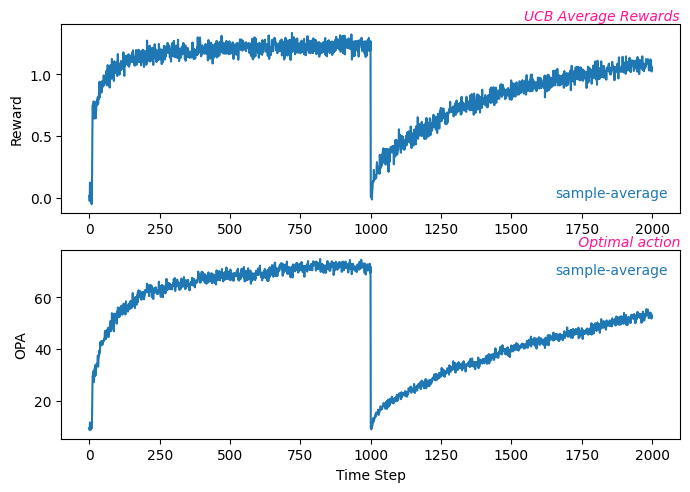

In [95]:
Num_actions = 10
c = 2
Time_step = 2000
alpha = 0.01
num_episode = 1000
select_action = np.zeros((Time_step , num_episode))
reward = np.zeros((Time_step , num_episode ))
optimal_action = np.zeros((Time_step , num_episode))
method = 'sample-average'                         # 'sample-average' or 'constant-alpha'
for i in range(0, num_episode):

    qs = np.random.randn(1,Num_actions)
    q = np.zeros((1 , Num_actions))
    counter = np.zeros((1 , Num_actions))
    for j in range(0, Time_step):
        # ===================================== Exploitation =============================================
        if j==np.floor(Time_step/2):                    # Non-stationary
            qs = np.random.randn(1,Num_actions)

        optimal_action[j,i] = np.argmax(qs)
        B = q + c*np.sqrt(np.log(j+1)/counter)
        B = np.where(np.isnan(B), 1e10, B)
        B = np.where(np.isinf(B), 1e10, B)
        A = np.where(B==np.max(B))[1]
        A = A[np.random.randint(0,len(A))]
        # ---------------------------------------- Exploration -------------------------------------------
        if np.random.rand(1) < epsilon:            #  [0 1]  epsilon = 0.1
           A =  np.random.randint(1,Num_actions , 1)
        # ------------------------------------------------------------------------------------------------
        select_action[j, i] = A
        reward[j, i]  = qs[:,A] + np.random.randn(1)
        counter[:, A] = counter[:,A]+1
        if method=='sample-average':
            q[:, A] = q[:, A] + (1/counter[:, A])*(reward[j, i] - q[:, A])
        else:
            q[:, A] = q[:, A] + alpha*(reward[j, i] - q[:, A])

    print(f"Episode {i} / {num_episode}")

mean_reward = np.mean(reward,  axis=1)
optimal_action_percent = np.zeros((Time_step, num_episode))

for i in range(0, num_episode):
    optimal_action_percent[:,i] = select_action[:, i] == optimal_action[:,i]
optimal_action_percent = np.mean(optimal_action_percent, axis=1)

fig, axs = plt.subplots(nrows=2, ncols=1, sharey='row', figsize=(7, 5))
plt.rcParams.update({'font.size': 10})
axs[0].plot(mean_reward,label=method)
axs[0].set_ylabel('Reward')
axs[0].legend(fontsize=10, ncol=1, frameon=False, loc='best', labelcolor='linecolor', handlelength=0)
axs[0].set_title(f"UCB Average Rewards", loc='right', y=1 + 0.17, pad=-20, color='deeppink', fontsize=10, fontstyle='italic')

axs[1].plot(optimal_action_percent*100,label=method)
axs[1].set_xlabel('Time Step')
axs[1].set_ylabel('OPA')
axs[1].legend(fontsize=10, ncol=1, frameon=False, loc='best', labelcolor='linecolor', handlelength=0)
axs[1].set_title(f" Optimal action", loc='right', y=1 + 0.17, pad=-20, color='deeppink', fontsize=10, fontstyle='italic')
plt.tight_layout(), plt.subplots_adjust(wspace=0, hspace=0.2), plt.show()
fig.savefig('UCB.svg', format='svg')

***Gradient bandit (Stochastic gradient ascent (SGA))***
$Pr({A_{t}=a})$=$e^{H_{t}(a)}\over{\sum_{b=1}^k e^{H_{t}(b)}}$=$\pi_{t}(a)$
$H_{t+1}(a)= H_t(a) + \alpha*(R_t - mean(R_t))(1_{\alpha=A_{t}} - \pi_{t}(a)$

Episode 0 / 100
Episode 1 / 100
Episode 2 / 100
Episode 3 / 100
Episode 4 / 100
Episode 5 / 100
Episode 6 / 100
Episode 7 / 100
Episode 8 / 100
Episode 9 / 100
Episode 10 / 100
Episode 11 / 100
Episode 12 / 100
Episode 13 / 100
Episode 14 / 100
Episode 15 / 100
Episode 16 / 100
Episode 17 / 100
Episode 18 / 100
Episode 19 / 100
Episode 20 / 100
Episode 21 / 100
Episode 22 / 100
Episode 23 / 100
Episode 24 / 100
Episode 25 / 100
Episode 26 / 100
Episode 27 / 100
Episode 28 / 100
Episode 29 / 100
Episode 30 / 100
Episode 31 / 100
Episode 32 / 100
Episode 33 / 100
Episode 34 / 100
Episode 35 / 100
Episode 36 / 100
Episode 37 / 100
Episode 38 / 100
Episode 39 / 100
Episode 40 / 100
Episode 41 / 100
Episode 42 / 100
Episode 43 / 100
Episode 44 / 100
Episode 45 / 100
Episode 46 / 100
Episode 47 / 100
Episode 48 / 100
Episode 49 / 100
Episode 50 / 100
Episode 51 / 100
Episode 52 / 100
Episode 53 / 100
Episode 54 / 100
Episode 55 / 100
Episode 56 / 100
Episode 57 / 100
Episode 58 / 100
Episode

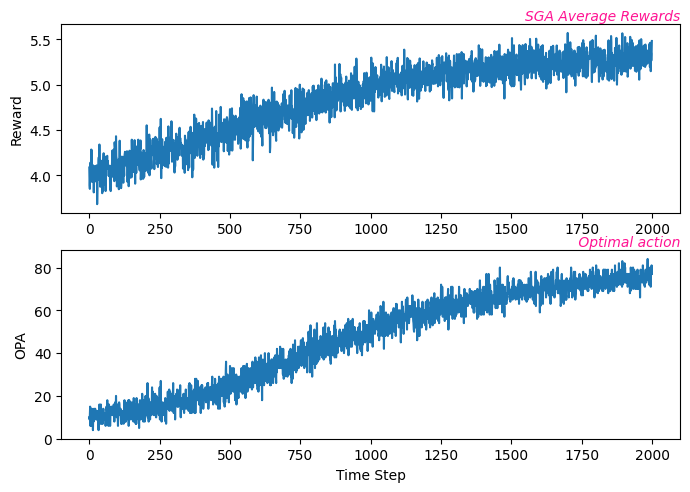

In [94]:
Num_actions = 10
Time_step = 2000                    # Time step
alpha = 0.01
num_episode = 100
reward = np.zeros((Time_step, num_episode))
select_action = np.zeros((Time_step, num_episode))
optimal_action = np.zeros((1, num_episode))
optimal_action_percent = np.zeros((Time_step, num_episode))

for i in range(0, num_episode):

    h = np.ones((1, Num_actions))
    qs = 4 + np.random.randn(1, Num_actions)
    optimal_action[:, i] = np.argmax(qs)
    for j in range(0, Time_step):
        pr = np.exp(h)/np.sum(np.exp(h), axis=1)
        A = np.random.choice( range(0, Num_actions) , size = 1, replace = False, p = pr.flatten())

        select_action[j, i] = A
        reward[j, i] = qs[:, A] + np.random.randn(1)

        if j==0:
            baseline = reward[j, i]
        else:
            baseline = np.mean(reward[0:j, i])

        h = h + alpha*(reward[j, i] - baseline)*(np.where(np.arange(10)==A,1-pr,-pr))
    print(f"Episode {i} / {num_episode}")

mean_reward = np.mean(reward, axis=1)

for i in range(0, num_episode):
    optimal_action_percent[:, i] = select_action[:, i] == optimal_action[:, i]
optimal_action_percent = np.mean(optimal_action_percent, axis=1)

fig, axs = plt.subplots(nrows=2, ncols=1, sharey='row', figsize=(7, 5))
plt.rcParams.update({'font.size': 10})
axs[0].plot(mean_reward, label='E-greedy Rewards')
axs[0].set_ylabel('Reward')
axs[0].set_title(f"SGA Average Rewards", loc='right', y=1 + 0.17, pad=-20, color='deeppink', fontsize=10, fontstyle='italic')

axs[1].plot(optimal_action_percent * 100, label='Optimal action')
axs[1].set_xlabel('Time Step')
axs[1].set_ylabel('OPA')
axs[1].set_title(f" Optimal action", loc='right', y=1 + 0.17, pad=-20, color='deeppink', fontsize=10, fontstyle='italic')
plt.tight_layout(), plt.subplots_adjust(wspace=0, hspace=0.2), plt.show()
fig.savefig('SGA.svg', format='svg')

***Set Parameters Epsilon greedy, UCB & SGA***

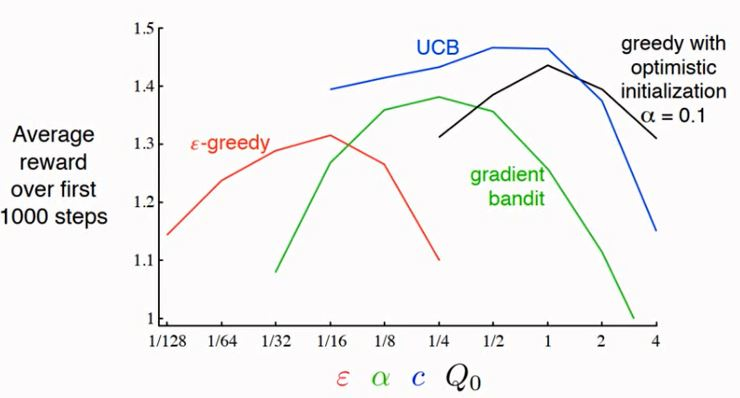

In [9]:
img_path='Set Parameters.JPG'
img=Image.open(img_path)
img